# Model Agnostic Global Explanation - Feature Importance 
##### compiled by - Bhushan Garware, Ph.D

In [5]:
# intsalling the required lobrary 
!pip install eli5 

In [6]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

In [7]:
#settings for figure displsy 
sns.set(style="white", palette="colorblind", font_scale=1.2, rc={"figure.figsize":(12,6)})

In [8]:
#reading diabetes dataset (PIMA Indians dataset -UCI Machine learning Repo)
df = pd.read_csv("Data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#seperate Traget and features 
target=df['Outcome']
df=df.drop(labels=['Outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [10]:
#train a model 
model=RandomForestClassifier(n_estimators=10,max_depth=5)
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.7402597402597403

In [11]:
import eli5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


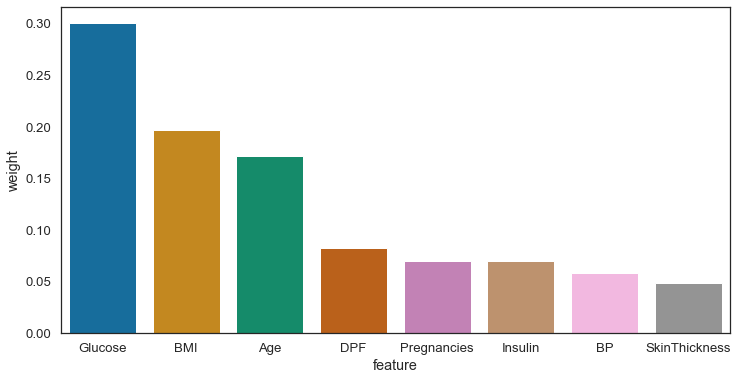

In [12]:
#feature importance
features=["Pregnancies","Glucose","BP","SkinThickness","Insulin","BMI","DPF","Age"]
classes=['non-diabetic','diabetic']
feat_imp_df = eli5.explain_weights_df(model, feature_names=features)
sns.barplot(x = 'feature',y = 'weight',data = feat_imp_df)
plt.show()

### Partial Depencence Polt

In [13]:
from sklearn.inspection import partial_dependence, plot_partial_dependence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\inspection\_partial_dependence.py:713: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  warnings.warn("The fig parameter is deprecated in version "


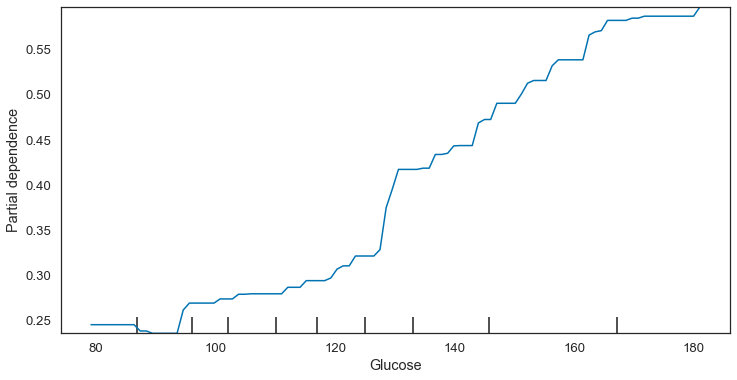

In [14]:
fig = plt.figure()
plot_partial_dependence(model, X_train, ['Glucose'], fig=fig)
plt.show()